We import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import decomposition
from sklearn import preprocessing
from sklearn import discriminant_analysis

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patheffects as PathEffects

We load datas

In [2]:
labels = np.load("labels.npy")
data = np.load("data.npy")

We create a panda's Dataframe with the datas

In [3]:
data = pd.DataFrame(
    data,
    index = labels,
    columns = ["s0", "s1", "s2", "s3", "s4", "s5"]
)
data.head()

,s0,s1,s2,s3,s4,s5
1.0,-1.381886,-8.906716,0.630329,3.765334,5.656322,-13.052375
1.0,-9.938546,21.025029,26.875148,44.585694,125.211138,-8.790609
1.0,-8.891138,3.641081,26.113794,46.293143,124.634525,-23.032334
1.0,-5.198424,0.399610,11.754090,17.375042,52.637311,-15.195663
1.0,9.365953,-6.301641,-18.468264,-18.545519,-73.950313,21.796217


We plot the range, their variance ans their mean of the datas for each sensors
<br><br><br>
We can see that the s4 have a larger range than the other


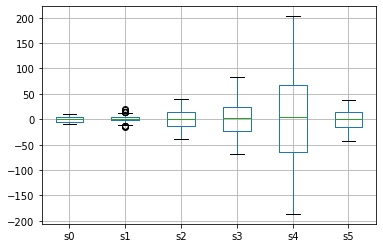

In [4]:
data.boxplot()
plt.show()

We display the scatter matrix of the datas to see the precision of the sensors
<br><br><br>
S0 and S5 seem to be less accurate than the other but they're still relatively precise

S1 does not seem to work at all, its values are all centered around 0 with a small deviation

S2, S3, S4 seem to be the moste accurate and precise sensor

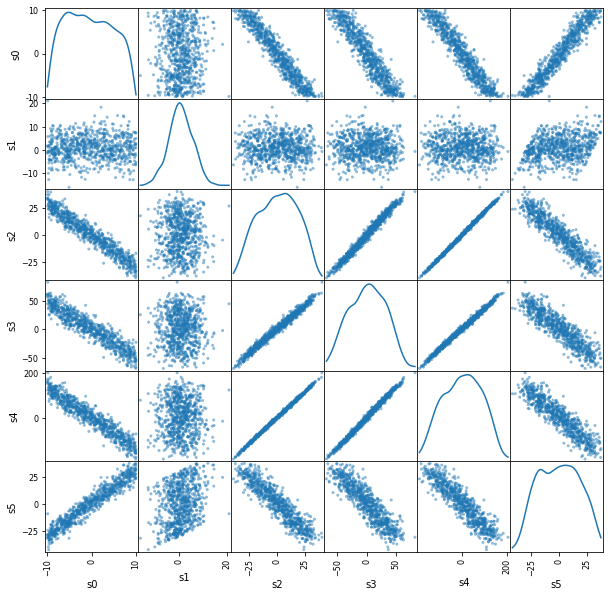

In [5]:
pd.plotting.scatter_matrix(
    data,
    diagonal='kde', # Plot density functions
    figsize = (10, 10), 
)
plt.show()

We display the variance covariance matrix of the datas
<br><br><br>
We can see that the s4 have the biggest covariance with itself and the biggest variance with the others when the s1 have the lowest

In [6]:
data.cov()

,s0,s1,s2,s3,s4,s5
s0,32.816511,0.349123,-96.026145,-158.449606,-446.528040,98.798658
s1,0.349123,25.290943,-1.449378,-2.721887,-7.070020,26.338313
s2,-96.026145,-1.449378,307.052932,515.254436,1436.413231,-289.527812
s3,-158.449606,-2.721887,515.254436,883.180665,2428.943972,-478.070704
s4,-446.528040,-7.070020,1436.413231,2428.943972,6738.183665,-1346.654141
s5,98.798658,26.338313,-289.527812,-478.070704,-1346.654141,322.734286


We display the correlation matrix of the datas
<br><br><br>
As expected we find high correlation values between S0, S2, S3, S4 and S5 but not with S1.

We can assume that he is broken

In [7]:
data.corr()

,s0,s1,s2,s3,s4,s5
s0,1.000000,0.012119,-0.956614,-0.930722,-0.949579,0.960024
s1,0.012119,1.000000,-0.016447,-0.018212,-0.017126,0.291530
s2,-0.956614,-0.016447,1.000000,0.989442,0.998623,-0.919732
s3,-0.930722,-0.018212,0.989442,1.000000,0.995683,-0.895457
s4,-0.949579,-0.017126,0.998623,0.995683,1.000000,-0.913192
s5,0.960024,0.291530,-0.919732,-0.895457,-0.913192,1.000000


Calculating Main components' eigenvalues.


Scikit-Learn PCA is not reduced by default. 
In addition, the divisor in the variance formula is that of an unbiased estimate, i.e. (n-1) instead of n.
<br><br><br>
We can see that only the first 3 dimensions are importants, the others are useless

In [8]:
pca = decomposition.PCA()

eigenvalue = pca.fit(data).explained_variance_
eigenvalue

array([8.22043548e+03, 6.86299682e+01, 1.53833329e+01, 4.81022061e+00,
       5.25170656e-29, 1.87828420e-30])

The eigenvectors are also the coefficients of the linear combinations of the variables allowing to define the principal variables.

In [9]:
pca.components_.T
components = pca.fit(data).transform(data)
components

array([[ 6.17306687e+00, -1.52274904e+01,  4.04550608e+00,
        -1.73372662e+00,  5.90697405e-15, -2.84751131e-15],
       [ 1.32483850e+02,  2.27780904e+01, -1.13356865e+01,
        -2.29540486e+00,  3.28430543e-15, -3.30608983e-15],
       [ 1.34926760e+02,  2.68175783e+00, -1.34012550e+00,
        -1.83569517e+00, -1.52145774e-16, -5.49229085e-15],
       ...,
       [ 1.01591053e+02,  2.43238883e+01,  6.68533219e+00,
        -1.34160960e+00, -1.94905805e-14,  2.09548814e-15],
       [-2.87860070e+01,  1.29739563e+01,  9.46417568e+00,
         6.63527511e-02, -1.51970991e-14,  4.11306302e-15],
       [-1.02913284e+02,  1.16121346e+01,  1.37195074e+00,
        -2.56270443e+00, -1.05402977e-14,  4.92226582e-15]])

We look at the variance and standar deviation of the dimensions
<br><br><br>
Here again, we can see that only the first 3 dimensions are importants, the others are useless

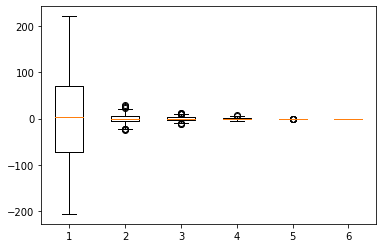

In [10]:
plt.boxplot(components)
plt.show()

We display the datas in the correct dimension, here in 2 dimensions
<br><br><br>
We can kind of see two classes but there is still an overlap at the center between the different labels so we cannot separate correctly our values

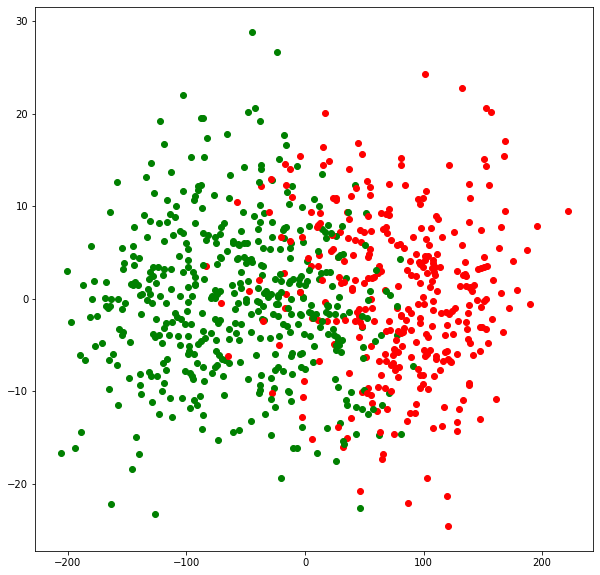

In [11]:
plt.figure(figsize = (10,10))
for i, j, label in zip(components[:,0], components[:,1], data.index):
    plt.scatter(i, j, color = 'g') if label == 0 else plt.scatter(i, j, color = 'r')
    
plt.show()

The sign of an eigenvector is not determined because it is a direction or 
subspace that is "proper" for a matrix. Depending on the algorithm or software used, the vector can be oriented in one direction or the other but it is the same direction that is defined. This has no influence on the interpretation of these results.

The most the line go to the right, the most it impact the first dimension and the most the line go to the top, the most it impact the second dimension
<br><br><br>
We can see that the first dimension is in majority made with s4 and a bit with s2 and s3 and the second dimension is in majority made with s1 and s5 and just a little bit with s0

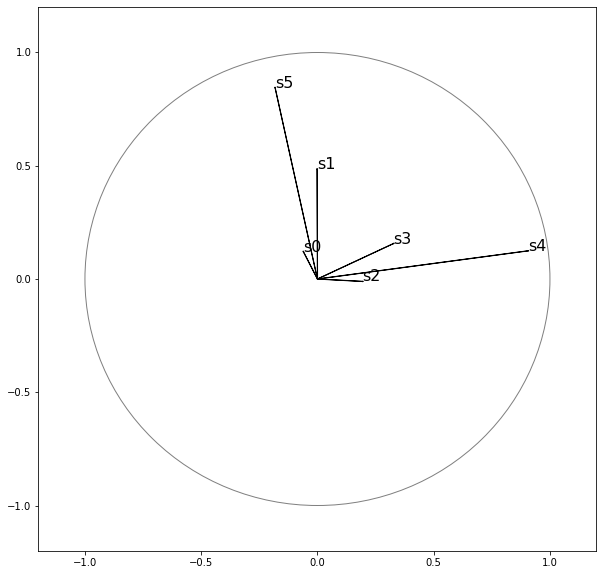

In [12]:
c1 = pca.components_[0] 
c2 = pca.components_[1] 

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)

for i, j, label in zip(c1, c2, data.columns):
    plt.text(i, j, label, fontsize=16)
    plt.arrow(0, 0, i, j, color='black')

plt.axis((-1.2, 1.2, -1.2, 1.2))
circle = plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(circle)
plt.show()

We display the datas in the correct dimension, here in 3 dimensions
<br><br><br>
In 3D we can find a plane that separete perfectly the classes, allowing us to predict the label based on the projected component with minimum error

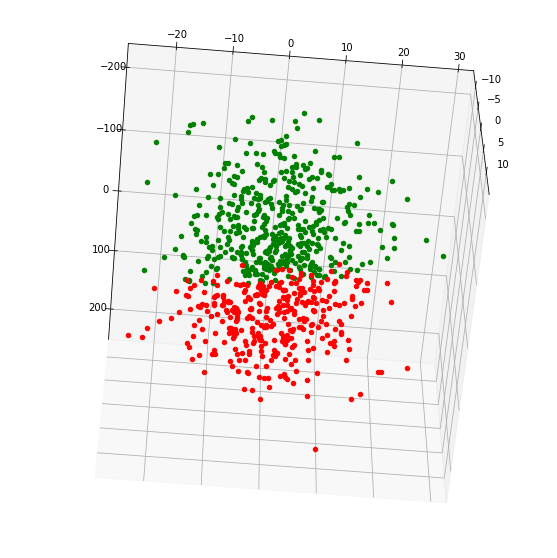

In [13]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d')
for i, j, k, label in zip(components[:,0], components[:,1], components[:,2], data.index):
    ax.scatter(i, j, k, color = 'g') if label == 0 else ax.scatter(i, j, k, color = 'r')
    
ax.view_init(120, 5)
plt.show()

Like the 2 dimensions, we display the importance a each sensor for each 3 dimensions. It's complicate to show it on an 2 dimensional plot so we display their representation on each dimension so on 3 plots.

- first plot :
  - right : first dimension
  - top : second dimension
- second plot :
  - right : first dimension
  - top : third dimension
- third plot :
  - right : second dimension
  - top : third dimension

<br><br><br>
We can see that the first dimension is made in majority of s4 with a bit of s2 and s3 but negate a bit by s5, the second is made in majority with s1 and s5 and the third dimension is in majority made with s3, s0 and s5 but is negate by s1 and a bit of s2

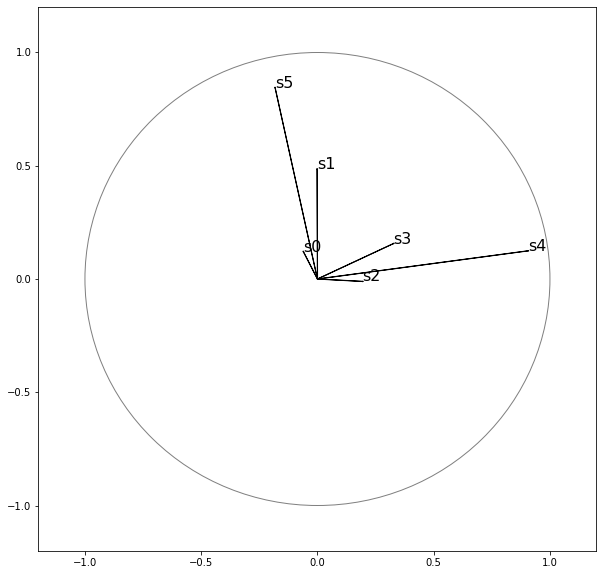

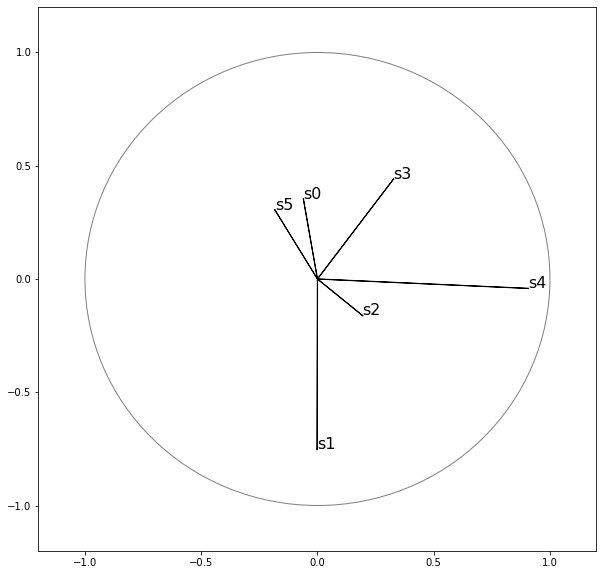

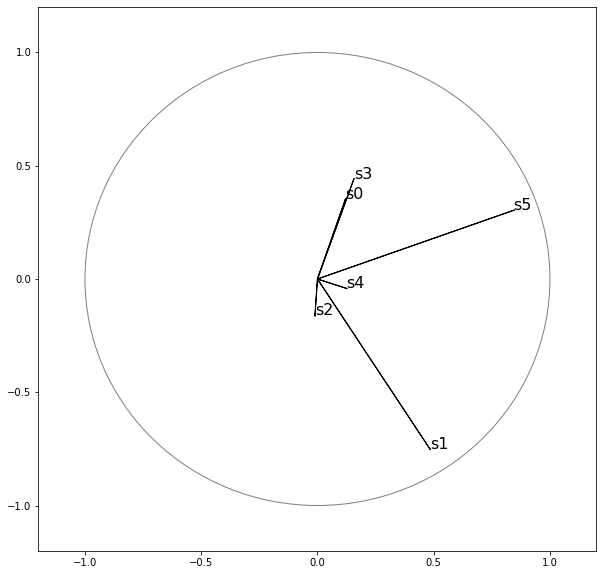

In [14]:
c1 = pca.components_[0]
c2 = pca.components_[1]
c3 = pca.components_[2]

for dim1, dim2 in [[c1,c2], [c1,c3], [c2, c3]]:
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(1, 1, 1)
    for i, j, label in zip(dim1, dim2, data.columns):
        ax.text(i, j, label, fontsize=16)
        ax.arrow(0, 0, i, j, color='black')
        
    plt.axis((-1.2, 1.2, -1.2, 1.2))
    circle = plt.Circle((0,0), radius=1, color='gray', fill=False)
    ax.add_patch(circle)
    plt.show()
